# Mean field VI code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, time, pickle
from IPython.display import clear_output

sys.path.insert(1, '../../src/')
#from discrete_mixflows import *
#from gibbs import *
#from concrete import *
#from aux import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 40})
#fig_path='fig/'
#fig_path='../../../discrete-ergodic-flows-tex/fig/'

In [2]:
########################
########################
# target specification #
########################
########################
np.random.seed(2023)
K1=10
prbs=np.random.rand(K1)
prbs=prbs/np.sum(prbs)
def lp(x,axis=None):
    # compute the univariate log joint and conditional target pmfs
    #
    # inputs:
    #    x    : (1,d) array with state values
    #    axis : int, full conditional to calculate; returns joint if None
    # outputs:
    #   ext_lprb : if axis is None, (d,) array with log joint; else, (d,K1) array with d conditionals 
    
    ext_lprb=np.log(np.repeat(prbs[:,np.newaxis],x.shape[1],axis=1).T)
    if axis==None: return np.squeeze(ext_lprb[np.arange(0,x.shape[1]),x])
    return ext_lprb
prbs_onedim=np.copy(prbs)

In [12]:
########################
########################
#    mean field 1D     #
########################
########################
def meanfield1D(lq0,lp,max_iters,gamma):
    """
    Discrete mean field VI for 1D distributions
    
    Inputs:
        lq0       : (K,) array, initial variational log probabilities
        lp        : (K,) array, target log probabilities
        max_iters : int, max number of gradient ascent iterations
        gamma     : function, step size (as function)
    """
    q=np.exp(lq0)
    for t in range(max_iters): q=q-gamma(t)*(np.log(q)-lp)
    return np.log(q)

In [18]:
########################
########################
#  fit mean field 1D   #
########################
########################
lq0=np.log(1/K1)*np.ones(K1)
lp=np.log(prbs_onedim)
max_iters=10000
ss=1e-2
gamma = lambda t : ss/np.sqrt(t+1)
mf_approx=np.exp(meanfield1D(lq0,lp,max_iters,gamma))

Text(0, 0.5, 'Probability')

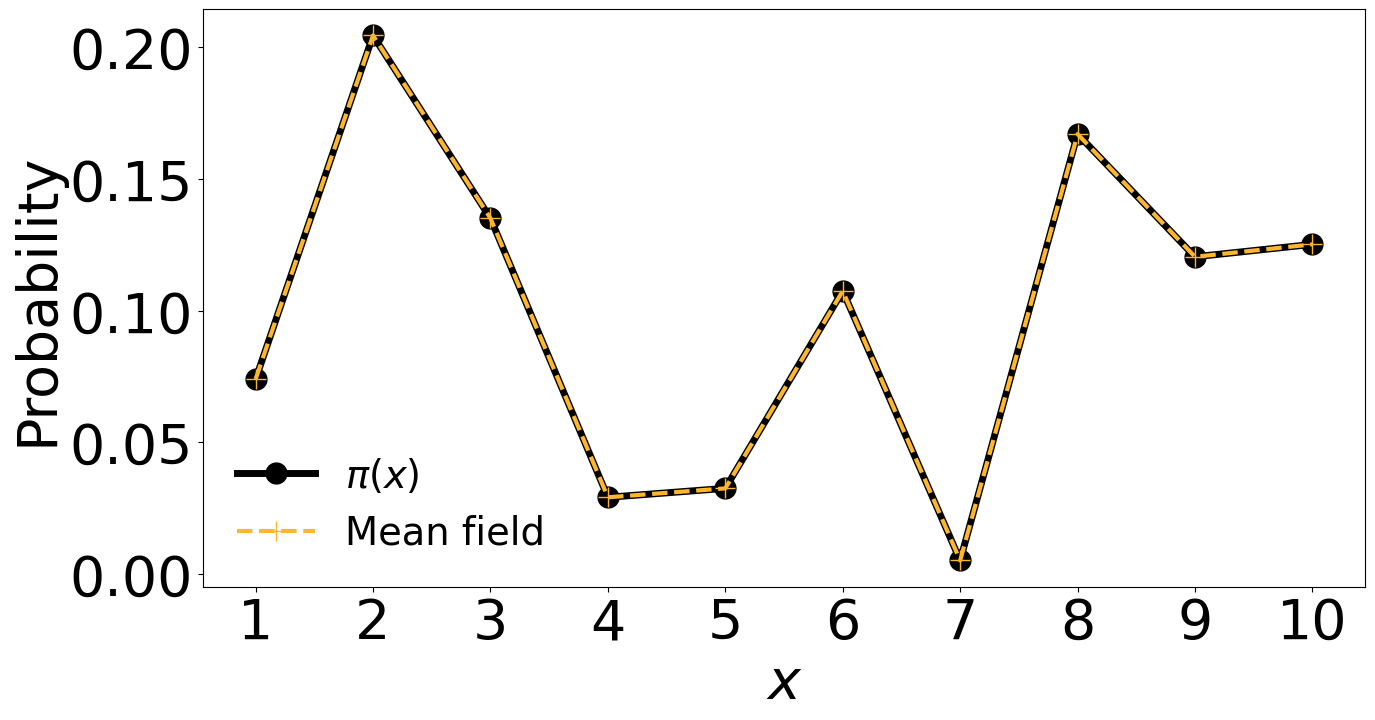

In [20]:
########################
########################
#     plot results     #
########################
########################

ttx=np.arange(0,10)
plt.plot(ttx+0.5,prbs_onedim,c="black", label=r'$\pi(x)$',lw=5,ms=15,marker='o')
plt.plot(ttx+0.5,mf_approx,c='#FEB72D', label='Mean field',lw=3,ls='dashed',ms=15,marker='+')
plt.legend(fontsize='x-small',frameon=False)
plt.xlabel(r'$x$')
plt.xticks(ticks=np.arange(0,10)+0.5,labels=np.arange(1,1+10))
plt.ylabel('Probability')